Derived from the notebook <a href="https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb">here</a> (Copyright 2019 The Tensorflow Authors), with modifications.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the 
# "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from   tensorflow import optimizers
from   tensorflow.keras.layers import Dense, Flatten
from   tensorflow.keras.models import Sequential
from   tensorflow.nn import relu, softmax


np.set_printoptions(linewidth=80)
print(tf.__version__)

2.3.1


In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
((training_images, training_labels), 
 (test_images, test_labels)) = mnist.load_data()

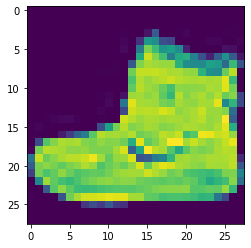

In [5]:
plt.imshow(training_images[0]);

In [6]:
print(training_labels[0])

9


In [7]:
print(training_images[0][:10, :10])

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]]


In [8]:
training_images[0].max()

255

In [9]:
training_images = training_images / 255.
test_images = test_images / 255.

In [10]:
mod = Sequential([Flatten(), 
                  Dense(128, activation=relu), 
                  Dense(10, activation=softmax)])

In [11]:
mod.compile(optimizer=optimizers.Adam(), 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])
mod.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 544us/step - loss: 0.4949 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 1s 547us/step - loss: 0.3726 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 1s 531us/step - loss: 0.3374 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 1s 532us/step - loss: 0.3121 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 1s 537us/step - loss: 0.2921 - accuracy: 0.8918


In [12]:
mod.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 402us/step - loss: 0.3383 - accuracy: 0.8780


[0.3382989466190338, 0.878000020980835]

In [13]:
classifications = mod.predict(test_images)

In [14]:
classifications[0]

array([1.9286558e-06, 8.4492385e-08, 6.2560514e-07, 3.6241776e-08,
       4.6666131e-07, 3.6562970e-03, 1.1174789e-05, 1.2700144e-02,
       6.2175836e-06, 9.8362309e-01], dtype=float32)

In [15]:
test_labels[0]

9

# Ex 2

In [16]:
mnist = tf.keras.datasets.mnist
((training_images, training_labels), 
 (test_images, test_labels)) = mnist.load_data()

training_images = training_images / 255.
test_images = test_images / 255.

In [17]:
mod = Sequential([Flatten(), 
                  Dense(1024, activation=relu), 
                  Dense(10, activation=softmax)])

In [18]:
mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
mod.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1842
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0759
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0476
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0358
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0255


In [22]:
mod.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 657us/step - loss: 0.0709


0.07091431319713593

In [20]:
preds = mod.predict(test_images)
preds[0], test_labels[0]

(array([1.5399844e-07, 1.6271417e-07, 2.0647487e-06, 2.2973698e-02,
        5.0373963e-12, 1.5201282e-07, 5.7851718e-12, 9.7702301e-01,
        5.2656242e-07, 1.7645655e-07], dtype=float32),
 7)

# Ex 3

What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [26]:
err_mod = Sequential([#Flatten(), 
                      Dense(1024, activation=relu), 
                      Dense(10, activation=softmax)])
err_mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
err_mod.fit(training_images, training_labels, epochs=5)

Epoch 1/5


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:748 train_step
        loss = self.compiled_loss(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1566 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4782 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4174 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4087 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).


# Ex 4

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [27]:
err_mod = Sequential([Flatten(), 
                      Dense(1024, activation=relu), 
                      Dense(5, activation=softmax)])
err_mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
err_mod.fit(training_images, training_labels, epochs=5)

Epoch 1/5


InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 9 2 2 2 8 6 6 0 9 2 7 0 2 7 6 8 7 6 3 4 3 7 5 3 3 2 9 4 7 5 8 5
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-27-b1d708927bec>:5) ]] [Op:__inference_train_function_42633]

Function call stack:
train_function


# Exercise 5:

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.